# Import Required Libraries
Import necessary libraries such as os, torch, numpy, PIL, albumentations, matplotlib, and torchvision.

In [1]:
# Import Required Libraries
import os
import torch
import numpy as np
from PIL import Image, ImageDraw, ImageFile
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn
import cv2

# Permitir carga de imágenes truncadas
ImageFile.LOAD_TRUNCATED_IMAGES = True

c:\Users\luisb250\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Define Model Classes
Define the model classes for bounding box, regions, ears, nose, and eyes using DenseNet121.

In [3]:
# Define Model Classes

# Definición de la clase del modelo para bounding box
class DenseNet121BoundingBox(nn.Module):
    def __init__(self):
        super(DenseNet121BoundingBox, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 4)
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definición de la clase del modelo para regiones
class DenseNet121Regions(nn.Module):
    def __init__(self):
        super(DenseNet121Regions, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definición de la clase del modelo para oreja izquierda
class DenseNet121EarLeft(nn.Module):
    def __init__(self):
        super(DenseNet121EarLeft, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definición de la clase del modelo para oreja derecha
class DenseNet121EarRight(nn.Module):
    def __init__(self):
        super(DenseNet121EarRight, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definición de la clase del modelo para la nariz
class DenseNet121Nose(nn.Module):
    def __init__(self):
        super(DenseNet121Nose, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 44)  # Cambiado a 22 coordenadas
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definición de la clase del modelo para ojo izquierdo
class DenseNet121EyeLeft(nn.Module):
    def __init__(self):
        super(DenseNet121EyeLeft, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 16)  # 8 puntos (x, y) = 16 coordenadas
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definición de la clase del modelo para ojo derecho
class DenseNet121EyeRight(nn.Module):
    def __init__(self):
        super(DenseNet121EyeRight, self).__init__()
        self.backbone = models.densenet121(pretrained=True)
        self.backbone.classifier = nn.Identity()
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 16)  # 8 puntos (x, y) = 16 coordenadas
        
    def forward(self, x):
        x = self.backbone(x)
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

# Definir el modelo ensamblado
class AssembledModel(nn.Module):
    def __init__(self):
        super(AssembledModel, self).__init__()
        self.bounding_box = DenseNet121BoundingBox()
        self.regions = DenseNet121Regions()
        self.ear_left = DenseNet121EarLeft()
        self.ear_right = DenseNet121EarRight()
        self.nose = DenseNet121Nose()
        self.eye_left = DenseNet121EyeLeft()
        self.eye_right = DenseNet121EyeRight()
    
    def forward(self, x):
        bounding_box = self.bounding_box(x)
        return bounding_box

    def predict_regions(self, cropped_image):
        regions = self.regions(cropped_image)
        return regions

    def predict_ear_left(self, cropped_image):
        ear_left = self.ear_left(cropped_image)
        return ear_left

    def predict_ear_right(self, cropped_image):
        ear_right = self.ear_right(cropped_image)
        return ear_right

    def predict_nose(self, cropped_image):
        nose = self.nose(cropped_image)
        return nose

    def predict_eye_left(self, cropped_image):
        eye_left = self.eye_left(cropped_image)
        return eye_left

    def predict_eye_right(self, cropped_image):
        eye_right = self.eye_right(cropped_image)
        return eye_right

# Load Pretrained Models
Load the pretrained models for bounding box, regions, ears, nose, and eyes.

In [4]:
# Load Pretrained Models

# Cargar el modelo ensamblado
assembled_model = AssembledModel()

# Definir rutas base para cada tipo de modelo
face_detector_path = os.path.join("..", "FaceDetector")
region_detector_path = os.path.join("..", "RegionDetector")
landmarks_path = os.path.join("..", "Landmarks_Optimizadores", "ADAM")

# Cargar los modelos con rutas relativas
assembled_model.bounding_box.load_state_dict(torch.load(os.path.join(face_detector_path, 'FaceDetector V3.pth')))
assembled_model.regions.load_state_dict(torch.load(os.path.join(region_detector_path, 'RegionDetector V2.pth')))
assembled_model.ear_left.load_state_dict(torch.load(os.path.join(landmarks_path, 'EarLeftLandmarks V2.pth')))
assembled_model.ear_right.load_state_dict(torch.load(os.path.join(landmarks_path, 'EarRightLandmarks V2.pth')))
assembled_model.nose.load_state_dict(torch.load(os.path.join(landmarks_path, 'NoseAreaLandmarks V2.pth')))
assembled_model.eye_left.load_state_dict(torch.load(os.path.join(landmarks_path, 'EyeLeftLandmarks V2.pth')))
assembled_model.eye_right.load_state_dict(torch.load(os.path.join(landmarks_path, 'EyeRightLandmarks V2.pth')))
assembled_model.eval()
assembled_model.cuda()


# Guarda el estado del modelo ensamblado en un archivo .pth
torch.save(assembled_model.state_dict(), 'Ensamblaje Modelo 1.pth')

print("Modelo ensamblado guardado exitosamente en 'Ensamblaje Modelo 1.pth'")
# Visualizar el modelo ensamblado cargado
print("Model loaded successfully!")

c:\Users\luisb250\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\luisb250\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\luisb250\AppData\Local\Temp\ipykernel_21216\1143789704.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary cod

Modelo ensamblado guardado exitosamente en 'Ensamblaje Modelo 1.pth'
Model loaded successfully!


# Define Helper Functions
Define helper functions for adjusting bounding boxes, cropping and resizing images, drawing points, rescaling points, and reverting transformations.

In [6]:
# Define Helper Functions

# Function to adjust the bounding box to the original size
def adjust_bbox_to_original(pred_bbox, original_size, target_size=(224, 224)):
    original_width, original_height = original_size
    target_width, target_height = target_size
    scale_x = original_width / target_width
    scale_y = original_height / target_height
    x_min, y_min, x_max, y_max = pred_bbox
    x_min = int(x_min * scale_x)
    y_min = int(y_min * scale_y)
    x_max = int(x_max * scale_x)
    y_max = int(y_max * scale_y)
    return [x_min, y_min, x_max, y_max]

# Function to crop and resize the image using the bounding box
def crop_and_resize(image, bounding_box, target_size=(224, 224)):
    cropped_image = image.crop(bounding_box)
    resized_image = cropped_image.resize(target_size)
    return resized_image

# Function to draw points on the image
def draw_points(image, points, color='red'):
    plt.imshow(image)
    for (x, y) in points:
        plt.scatter(x, y, c=color, s=5)
    plt.show()

# Function to rescale the points to the original size
def rescale_points(pred_points, orig_size, crop_box, resized_size=(224, 224)):
    crop_width = crop_box[2] - crop_box[0]
    crop_height = crop_box[3] - crop_box[1]
    scale_x = crop_width / resized_size[0]
    scale_y = crop_height / resized_size[1]

    # Print statements to verify dimensions and scales
    print(f"Original size: {orig_size}")
    print(f"Crop box: {crop_box}")
    print(f"Resized size: {resized_size}")
    print(f"Scale X: {scale_x}, Scale Y: {scale_y}")

    pred_points[:, 0] = pred_points[:, 0] * scale_x + crop_box[0]
    pred_points[:, 1] = pred_points[:, 1] * scale_y + crop_box[1]
    
    # Print the rescaled points
    print(f"Rescaled points: {pred_points}")
    
    return pred_points
# Modificación en revert_transformations_and_plot para ajustar correctamente las coordenadas después de deshacer el recorte y la rotación inversa
def revert_transformations_and_plot(image_path, landmarks, x_min, y_min, x_max, y_max, angle, centro, x1, y1, crop_size):
    # Cargar la imagen original
    image_original = Image.open(image_path).convert('RGB')
    image_original_np = np.array(image_original)
    
    # Convertir landmarks a numpy array
    landmarks = np.array(landmarks)
    
    # Deshacer el redimensionamiento de 224x224 a crop_size
    scale_x = crop_size / 224
    scale_y = crop_size / 224
    landmarks[:, 0] *= scale_x
    landmarks[:, 1] *= scale_y
    
    # Deshacer el recorte alrededor del punto centrado
    landmarks[:, 0] += x1
    landmarks[:, 1] += y1
    
    # Deshacer la rotación
    M = cv2.getRotationMatrix2D((centro[0], centro[1]), -angle, 1)
    landmarks = cv2.transform(np.array([landmarks]), M)[0]
    
    # Ajustar las coordenadas a las dimensiones originales de la imagen
    crop_box = [x_min, y_min, x_max, y_max]
    
    # Rescalar los puntos a las dimensiones originales de la imagen
    landmarks = rescale_points(landmarks, image_original_np.shape[:2], crop_box)
    
    # Imprimir valores para verificar antes de llamar a rescale_points
    print(f"Landmarks antes de rescalar: {landmarks}")
    print(f"Tamaño de la imagen original: {image_original_np.shape[:2]}")
    print(f"Crop box: {crop_box}")

    # Visualizar los puntos ajustados en la imagen original
    plt.figure()
    plt.title("Ajustado a las dimensiones originales")
    draw_points(image_original_np, landmarks)
    
    return landmarks
def draw_all_points(image, pred_points, ear_left_points, ear_right_points, nose_points, eye_left_points, eye_right_points):
    plt.imshow(image)
    
    # Dibujar puntos de las regiones
    for (x, y) in pred_points:
        plt.scatter(x, y, c='blue', s=1, label='Regions' if 'Regions' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Dibujar puntos de la oreja izquierda
    for (x, y) in ear_left_points:
        plt.scatter(x, y, c='green', s=2, label='Ear Left' if 'Ear Left' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Dibujar puntos de la oreja derecha
    for (x, y) in ear_right_points:
        plt.scatter(x, y, c='yellow', s=2, label='Ear Right' if 'Ear Right' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Dibujar puntos de la nariz
    for (x, y) in nose_points:
        plt.scatter(x, y, c='red', s=2, label='Nose' if 'Nose' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Dibujar puntos del ojo izquierdo
    for (x, y) in eye_left_points:
        plt.scatter(x, y, c='purple', s=2, label='Eye Left' if 'Eye Left' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Dibujar puntos del ojo derecho
    for (x, y) in eye_right_points:
        plt.scatter(x, y, c='orange', s=2, label='Eye Right' if 'Eye Right' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    plt.legend()
    plt.show()
# Function to predict regions and rescale points
def predict_and_rescale_regions(assembled_model, cropped_image_transformed, orig_size, crop_box):
    # Predict the regions
    with torch.no_grad():
        pred_points = assembled_model.regions(cropped_image_transformed).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points (224x224): {pred_points}")

    # Rescale the predicted points
    pred_points_rescaled = rescale_points(pred_points, orig_size, crop_box)
    print(f"Rescaled points: {pred_points_rescaled}")

    return pred_points_rescaled

# Función para combinar todas las predicciones en un solo vector
def combine_predictions(ojo_der_points, ojo_izq_points, oreja_der_points, oreja_izq_points, nariz_points):
    # Crear un vector de 48 puntos inicializado con ceros
    all_points = np.zeros((48, 2))

    # Asignar los puntos a sus respectivas posiciones en el vector final
    indices = {
        "ojo_der": [3, 4, 5, 6, 7, 36, 37, 38],
        "ojo_izq": [1, 8, 9, 10, 11, 39, 40, 41],
        "oreja_der": [22, 23, 24, 25, 26],
        "oreja_izq": [27, 28, 29, 30, 31],
        "nariz": [0, 2, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 32, 33, 34, 35, 42, 43, 44, 45, 46, 47]
    }

    for i, idx in enumerate(indices["ojo_der"]):
        all_points[idx] = ojo_der_points[i]
    for i, idx in enumerate(indices["ojo_izq"]):
        all_points[idx] = ojo_izq_points[i]
    for i, idx in enumerate(indices["oreja_der"]):
        all_points[idx] = oreja_der_points[i]
    for i, idx in enumerate(indices["oreja_izq"]):
        all_points[idx] = oreja_izq_points[i]
    for i, idx in enumerate(indices["nariz"]):
        all_points[idx] = nariz_points[i]

    return all_points.flatten()

# Función para graficar los puntos y escribir la posición de los puntos en la imagen
def plot_points_with_indices(image, points):
    image_original = Image.open(image).convert('RGB')
    image_original_np = np.array(image_original)
    plt.imshow(image_original_np)
    points = points.reshape(-1, 2)
    for i, (x, y) in enumerate(points):
        plt.scatter(x, y, c='red', s=10)
        plt.text(x, y, str(i), fontsize=12, color='blue')
    plt.show()

# Predict and Visualize
Implement the predict_and_visualize function to predict and visualize each step, including printing images with points at each step.

Predicted bounding box (224x224): [ 51.213924  55.85933  187.09375  157.74881 ]
Adjusted bounding box (original size): [274, 398, 1002, 1126]
Predicted points (224x224): [[ 74.85918  116.26274 ]
 [135.18974  120.092415]
 [ 43.629948  64.115654]
 [165.78242   72.12135 ]
 [105.20502  159.64308 ]]
Ojo derecho: [ 74.85918 116.26274]
Ojo izquierdo: [135.18974  120.092415]
Oreja derecha: [43.629948 64.115654]
Oreja izquierda: [165.78242  72.12135]
Nariz: [105.20502 159.64308]
Ángulo de rotación: 3.632157325744629
Centro de la oreja izquierda: [163.17873  68.76163]
Centro oreja izquierda después del ajuste: [np.float32(112.35745), np.float32(113.523254)]
Predicted points for ear_left (224x224): [[ 58.5808   122.64347 ]
 [ 98.298256  84.560684]
 [150.9933    44.71676 ]
 [129.81741  121.17823 ]
 [115.86727  181.79778 ]]


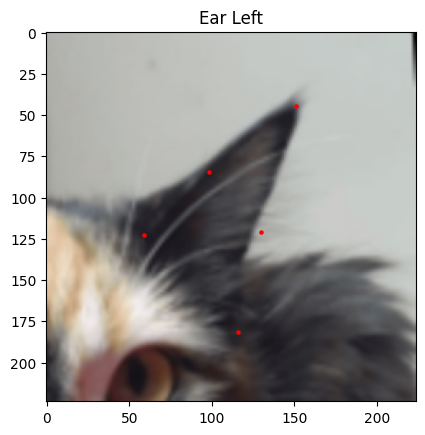

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[725.0647  641.4856 ]
 [793.3963  583.8141 ]
 [882.95544 524.62244]
 [840.74243 646.4428 ]
 [811.87854 743.3157 ]]
Landmarks antes de rescalar: [[725.0647  641.4856 ]
 [793.3963  583.8141 ]
 [882.95544 524.62244]
 [840.74243 646.4428 ]
 [811.87854 743.3157 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


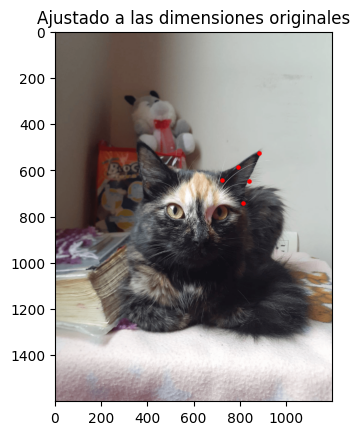

Centro de la oreja derecha: [40.764446 68.510445]
Centro oreja derecha después del ajuste: [np.float32(111.52889), np.float32(113.02089)]
Predicted points for ear_right (224x224): [[ 93.85439  204.97655 ]
 [ 77.51775  123.000854]
 [ 72.94215   33.090183]
 [136.23631   79.282974]
 [178.12175  125.22259 ]]


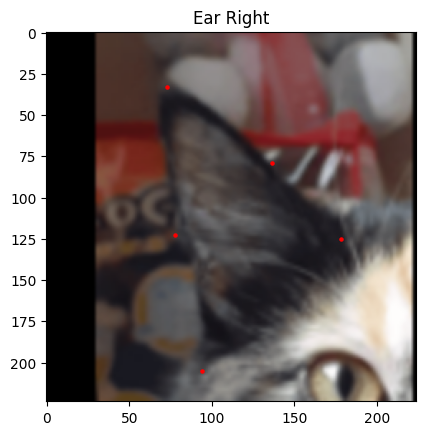

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[377.98093 753.6881 ]
 [359.92618 619.0635 ]
 [361.7616  472.78104]
 [459.6527  554.20935]
 [522.8506  633.0232 ]]
Landmarks antes de rescalar: [[377.98093 753.6881 ]
 [359.92618 619.0635 ]
 [361.7616  472.78104]
 [459.6527  554.20935]
 [522.8506  633.0232 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


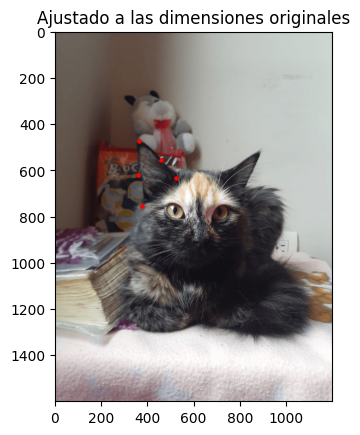

Centro de la nariz: [108.267555 159.94516 ]
Centro nariz después del ajuste: [np.float32(112.53511), np.float32(113.89032)]
Predicted points for nose (224x224): [[112.93957  144.47435 ]
 [113.27513  155.50813 ]
 [102.685165 102.41882 ]
 [123.52435  102.281906]
 [ 93.789696 109.64157 ]
 [131.98743  108.82375 ]
 [113.51768  131.46277 ]
 [113.64256  137.93375 ]
 [126.81914  144.5699  ]
 [146.62488  147.40213 ]
 [100.10538  144.8098  ]
 [ 80.12738  149.70177 ]
 [ 46.98167  107.66231 ]
 [ 81.53839  127.447914]
 [143.73207  126.24169 ]
 [175.95789  105.46866 ]
 [ 72.43541  109.12114 ]
 [152.87973  106.51884 ]
 [101.93259  116.92525 ]
 [123.38904  116.221535]
 [ 56.782024 137.08371 ]
 [167.98679  134.61539 ]]


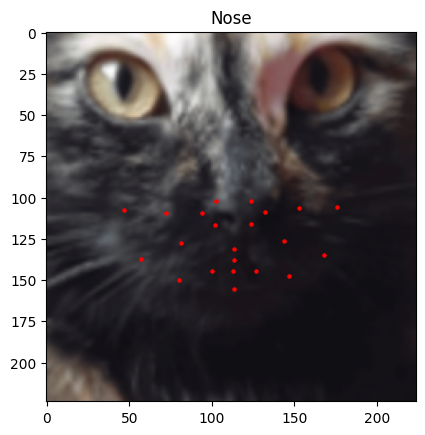

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[613.92267 966.2833 ]
 [613.33093 984.21173]
 [601.62213 897.0247 ]
 [635.4319  898.948  ]
 [586.4525  907.8224 ]
 [648.4833  910.42834]
 [616.1997  945.24146]
 [615.7361  955.7486 ]
 [636.4218  967.86707]
 [668.24994 974.49915]
 [593.07446 965.50616]
 [560.1718  971.383  ]
 [510.74597 899.7939 ]
 [564.75104 935.4383 ]
 [665.73694 939.88477]
 [720.13715 909.5138 ]
 [551.875   904.78015]
 [682.60236 908.8411 ]
 [598.9083  920.4728 ]
 [633.7774  921.5404 ]
 [523.6108  948.5165 ]
 [704.2097  955.9615 ]]
Landmarks antes de rescalar: [[613.92267 966.2833 ]
 [613.33093 984.21173]
 [601.62213 897.0247 ]
 [635.4319  898.948  ]
 [586.4525  907.8224 ]
 [648.4833  910.42834]
 [616.1997  945.24146]
 [615.7361  955.7486 ]
 [636.4218  967.86707]
 [668.24994 974.49915]
 [593.07446 965.50616]
 [560.1718  971.383  ]
 [510.74597 899.7939 ]
 [564.75104 935.4383 ]
 [665.7369

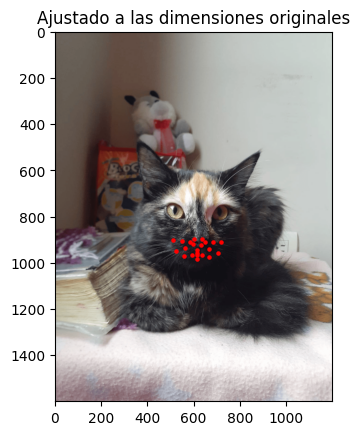

Centro del ojo izquierdo: [135.6865   118.574394]
Centro ojo izquierdo después del ajuste: [np.float32(114.74597), np.float32(114.29758)]
Predicted points for ojo_izq (224x224): [[112.102264 130.66031 ]
 [158.8524    88.15308 ]
 [ 66.21254  144.10385 ]
 [108.29365   67.91335 ]
 [114.431465 164.53346 ]
 [109.67603   82.042915]
 [ 98.01527  113.5487  ]
 [125.62912  103.07802 ]]


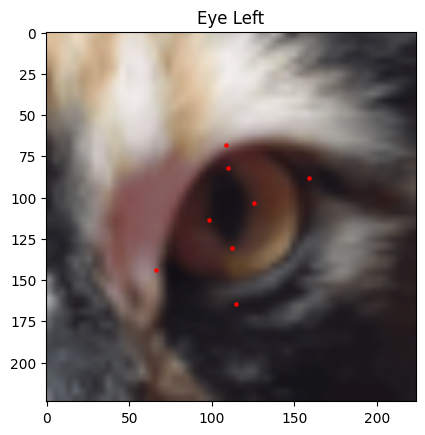

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[710.9779  800.7822 ]
 [751.0741  768.7208 ]
 [673.07544 809.32117]
 [711.1194  749.7067 ]
 [711.12305 828.3688 ]
 [711.513   761.23505]
 [700.43604 786.1819 ]
 [723.36615 779.1129 ]]
Landmarks antes de rescalar: [[710.9779  800.7822 ]
 [751.0741  768.7208 ]
 [673.07544 809.32117]
 [711.1194  749.7067 ]
 [711.12305 828.3688 ]
 [711.513   761.23505]
 [700.43604 786.1819 ]
 [723.36615 779.1129 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


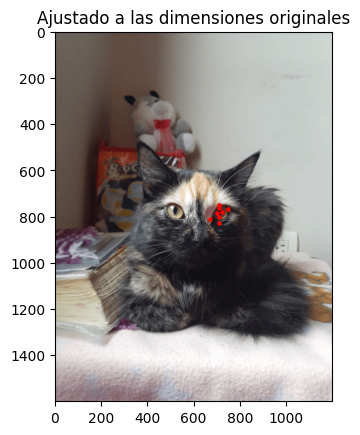

Centro del ojo derecho: [ 75.2345   118.574394]
Centro ojo derecho después del ajuste: [np.float32(112.93799), np.float32(114.29758)]
Predicted points for ojo_der (224x224): [[113.94134  137.30612 ]
 [ 61.221897 100.986595]
 [172.47612  136.58066 ]
 [114.96655   64.95797 ]
 [112.55666  165.73596 ]
 [101.88266  111.16673 ]
 [127.237114 113.71728 ]
 [114.00771   86.2594  ]]


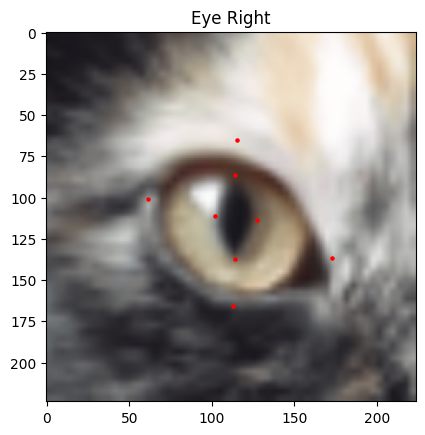

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[517.50696 794.28467]
 [476.62793 762.1207 ]
 [565.0083  796.70935]
 [522.06226 735.6726 ]
 [514.92084 817.26624]
 [509.07443 772.4684 ]
 [529.5023  775.84155]
 [520.18835 752.8959 ]]
Landmarks antes de rescalar: [[517.50696 794.28467]
 [476.62793 762.1207 ]
 [565.0083  796.70935]
 [522.06226 735.6726 ]
 [514.92084 817.26624]
 [509.07443 772.4684 ]
 [529.5023  775.84155]
 [520.18835 752.8959 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


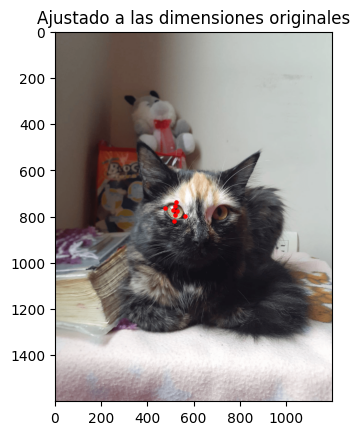

Predicted points (224x224): [[ 74.85918  116.26274 ]
 [135.18974  120.092415]
 [ 43.629948  64.115654]
 [165.78242   72.12135 ]
 [105.20502  159.64308 ]]
Original size: (1200, 1600)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[517.29236 775.8539 ]
 [713.3667  788.30035]
 [415.79733 606.37585]
 [812.7929  632.3944 ]
 [615.9163  916.84   ]]
Rescaled points: [[517.29236 775.8539 ]
 [713.3667  788.30035]
 [415.79733 606.37585]
 [812.7929  632.3944 ]
 [615.9163  916.84   ]]


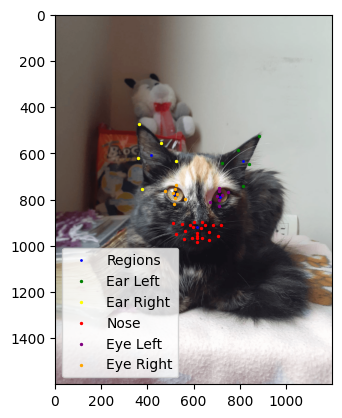

Predicted bounding box (224x224): [ 51.213924  55.85933  187.09375  157.74881 ]
Adjusted bounding box (original size): [274, 398, 1002, 1126]
Predicted points (224x224): [[ 74.85918  116.26274 ]
 [135.18974  120.092415]
 [ 43.629948  64.115654]
 [165.78242   72.12135 ]
 [105.20502  159.64308 ]]
Ojo derecho: [ 74.85918 116.26274]
Ojo izquierdo: [135.18974  120.092415]
Oreja derecha: [43.629948 64.115654]
Oreja izquierda: [165.78242  72.12135]
Nariz: [105.20502 159.64308]
Ángulo de rotación: 3.632157325744629
Centro de la oreja izquierda: [163.17873  68.76163]
Centro oreja izquierda después del ajuste: [np.float32(112.35745), np.float32(113.523254)]
Predicted points for ear_left (224x224): [[ 58.5808   122.64347 ]
 [ 98.298256  84.560684]
 [150.9933    44.71676 ]
 [129.81741  121.17823 ]
 [115.86727  181.79778 ]]


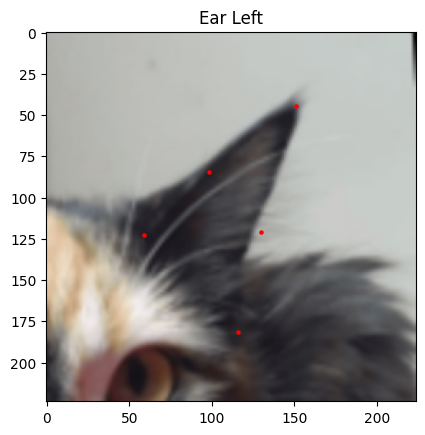

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[725.0647  641.4856 ]
 [793.3963  583.8141 ]
 [882.95544 524.62244]
 [840.74243 646.4428 ]
 [811.87854 743.3157 ]]
Landmarks antes de rescalar: [[725.0647  641.4856 ]
 [793.3963  583.8141 ]
 [882.95544 524.62244]
 [840.74243 646.4428 ]
 [811.87854 743.3157 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


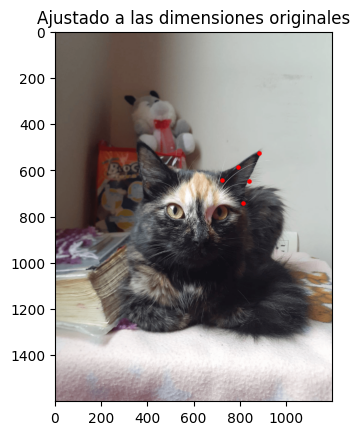

Centro de la oreja derecha: [40.764446 68.510445]
Centro oreja derecha después del ajuste: [np.float32(111.52889), np.float32(113.02089)]
Predicted points for ear_right (224x224): [[ 93.85439  204.97655 ]
 [ 77.51775  123.000854]
 [ 72.94215   33.090183]
 [136.23631   79.282974]
 [178.12175  125.22259 ]]


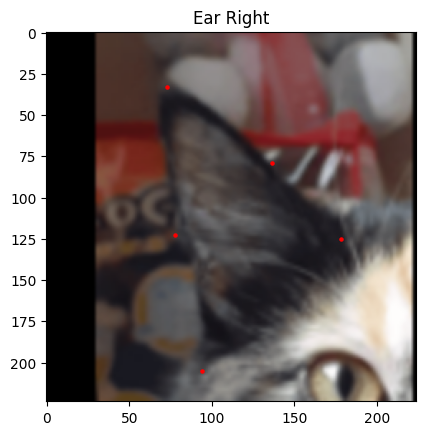

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[377.98093 753.6881 ]
 [359.92618 619.0635 ]
 [361.7616  472.78104]
 [459.6527  554.20935]
 [522.8506  633.0232 ]]
Landmarks antes de rescalar: [[377.98093 753.6881 ]
 [359.92618 619.0635 ]
 [361.7616  472.78104]
 [459.6527  554.20935]
 [522.8506  633.0232 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


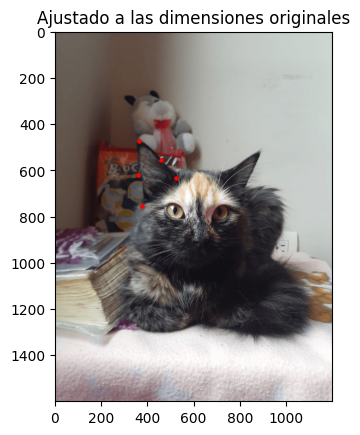

Centro de la nariz: [108.267555 159.94516 ]
Centro nariz después del ajuste: [np.float32(112.53511), np.float32(113.89032)]
Predicted points for nose (224x224): [[112.93957  144.47435 ]
 [113.27513  155.50813 ]
 [102.685165 102.41882 ]
 [123.52435  102.281906]
 [ 93.789696 109.64157 ]
 [131.98743  108.82375 ]
 [113.51768  131.46277 ]
 [113.64256  137.93375 ]
 [126.81914  144.5699  ]
 [146.62488  147.40213 ]
 [100.10538  144.8098  ]
 [ 80.12738  149.70177 ]
 [ 46.98167  107.66231 ]
 [ 81.53839  127.447914]
 [143.73207  126.24169 ]
 [175.95789  105.46866 ]
 [ 72.43541  109.12114 ]
 [152.87973  106.51884 ]
 [101.93259  116.92525 ]
 [123.38904  116.221535]
 [ 56.782024 137.08371 ]
 [167.98679  134.61539 ]]


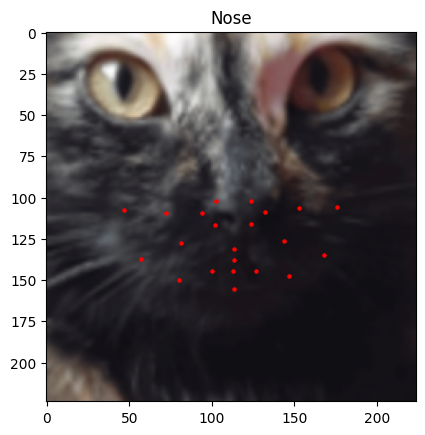

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[613.92267 966.2833 ]
 [613.33093 984.21173]
 [601.62213 897.0247 ]
 [635.4319  898.948  ]
 [586.4525  907.8224 ]
 [648.4833  910.42834]
 [616.1997  945.24146]
 [615.7361  955.7486 ]
 [636.4218  967.86707]
 [668.24994 974.49915]
 [593.07446 965.50616]
 [560.1718  971.383  ]
 [510.74597 899.7939 ]
 [564.75104 935.4383 ]
 [665.73694 939.88477]
 [720.13715 909.5138 ]
 [551.875   904.78015]
 [682.60236 908.8411 ]
 [598.9083  920.4728 ]
 [633.7774  921.5404 ]
 [523.6108  948.5165 ]
 [704.2097  955.9615 ]]
Landmarks antes de rescalar: [[613.92267 966.2833 ]
 [613.33093 984.21173]
 [601.62213 897.0247 ]
 [635.4319  898.948  ]
 [586.4525  907.8224 ]
 [648.4833  910.42834]
 [616.1997  945.24146]
 [615.7361  955.7486 ]
 [636.4218  967.86707]
 [668.24994 974.49915]
 [593.07446 965.50616]
 [560.1718  971.383  ]
 [510.74597 899.7939 ]
 [564.75104 935.4383 ]
 [665.7369

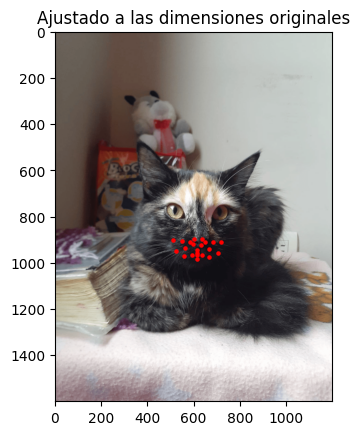

Centro del ojo izquierdo: [135.6865   118.574394]
Centro ojo izquierdo después del ajuste: [np.float32(114.74597), np.float32(114.29758)]
Predicted points for ojo_izq (224x224): [[112.102264 130.66031 ]
 [158.8524    88.15308 ]
 [ 66.21254  144.10385 ]
 [108.29365   67.91335 ]
 [114.431465 164.53346 ]
 [109.67603   82.042915]
 [ 98.01527  113.5487  ]
 [125.62912  103.07802 ]]


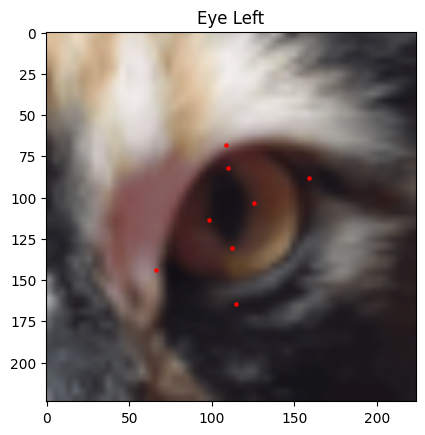

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[710.9779  800.7822 ]
 [751.0741  768.7208 ]
 [673.07544 809.32117]
 [711.1194  749.7067 ]
 [711.12305 828.3688 ]
 [711.513   761.23505]
 [700.43604 786.1819 ]
 [723.36615 779.1129 ]]
Landmarks antes de rescalar: [[710.9779  800.7822 ]
 [751.0741  768.7208 ]
 [673.07544 809.32117]
 [711.1194  749.7067 ]
 [711.12305 828.3688 ]
 [711.513   761.23505]
 [700.43604 786.1819 ]
 [723.36615 779.1129 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


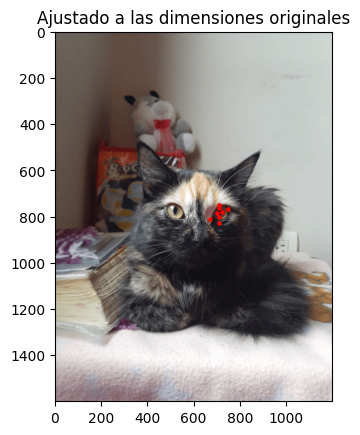

Centro del ojo derecho: [ 75.2345   118.574394]
Centro ojo derecho después del ajuste: [np.float32(112.93799), np.float32(114.29758)]
Predicted points for ojo_der (224x224): [[113.94134  137.30612 ]
 [ 61.221897 100.986595]
 [172.47612  136.58066 ]
 [114.96655   64.95797 ]
 [112.55666  165.73596 ]
 [101.88266  111.16673 ]
 [127.237114 113.71728 ]
 [114.00771   86.2594  ]]


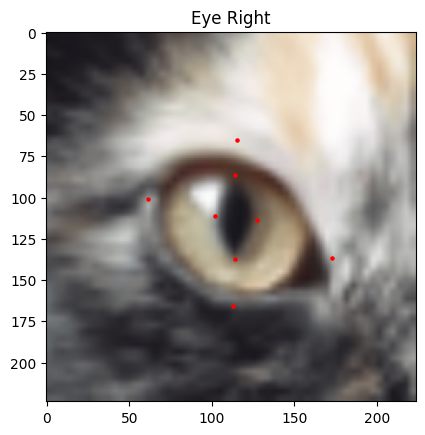

Original size: (1600, 1200)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[517.50696 794.28467]
 [476.62793 762.1207 ]
 [565.0083  796.70935]
 [522.06226 735.6726 ]
 [514.92084 817.26624]
 [509.07443 772.4684 ]
 [529.5023  775.84155]
 [520.18835 752.8959 ]]
Landmarks antes de rescalar: [[517.50696 794.28467]
 [476.62793 762.1207 ]
 [565.0083  796.70935]
 [522.06226 735.6726 ]
 [514.92084 817.26624]
 [509.07443 772.4684 ]
 [529.5023  775.84155]
 [520.18835 752.8959 ]]
Tamaño de la imagen original: (1600, 1200)
Crop box: [274, 398, 1002, 1126]


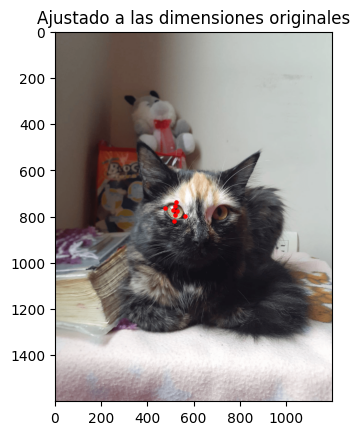

Predicted points (224x224): [[ 74.85918  116.26274 ]
 [135.18974  120.092415]
 [ 43.629948  64.115654]
 [165.78242   72.12135 ]
 [105.20502  159.64308 ]]
Original size: (1200, 1600)
Crop box: [274, 398, 1002, 1126]
Resized size: (224, 224)
Scale X: 3.25, Scale Y: 3.25
Rescaled points: [[517.29236 775.8539 ]
 [713.3667  788.30035]
 [415.79733 606.37585]
 [812.7929  632.3944 ]
 [615.9163  916.84   ]]
Rescaled points: [[517.29236 775.8539 ]
 [713.3667  788.30035]
 [415.79733 606.37585]
 [812.7929  632.3944 ]
 [615.9163  916.84   ]]


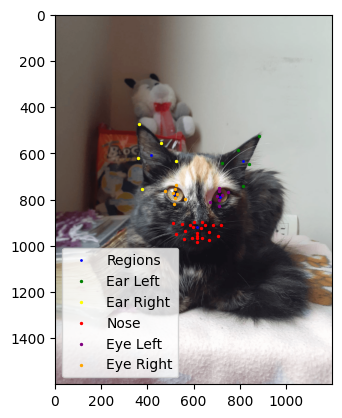

Vector combinado de todos los puntos:
[613.92266846 966.2833252  710.97790527 800.78222656 613.33093262
 984.21173096 517.50695801 794.28466797 476.62792969 762.12072754
 565.00830078 796.70935059 522.06225586 735.67260742 514.9208374
 817.26623535 751.07409668 768.7208252  673.07543945 809.32116699
 711.11938477 749.70672607 711.12304688 828.36877441 601.62213135
 897.02471924 635.43188477 898.94799805 586.45251465 907.8223877
 648.48327637 910.42834473 616.19970703 945.24145508 615.73608398
 955.74859619 636.42181396 967.86706543 668.24993896 974.49914551
 593.07446289 965.50616455 560.17181396 971.38299561 377.98092651
 753.68811035 359.92617798 619.06347656 361.76159668 472.78103638
 459.65270996 554.20935059 522.85058594 633.02319336 725.06469727
 641.4855957  793.39630127 583.81408691 882.95544434 524.62243652
 840.74243164 646.44281006 811.87854004 743.31567383 510.74597168
 899.79388428 564.7510376  935.43829346 665.73693848 939.88476562
 720.137146   909.51379395 509.07443237 

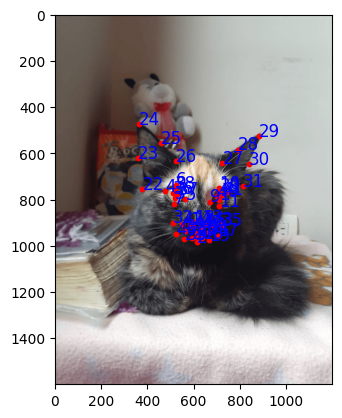

In [ ]:
# Función para predecir y visualizar
def predict_and_visualize(assembled_model, image_path):
    # Load the original image
    image = Image.open(image_path).convert('RGB')
    original_size = image.size

    # Transform the image for the bounding box model
    transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])
    image_transformed = transform(image=np.array(image))['image'].unsqueeze(0).cuda()

    # Predict the bounding box
    with torch.no_grad():
        pred_bbox = assembled_model.bounding_box(image_transformed).cpu().numpy()[0]
    print(f"Predicted bounding box (224x224): {pred_bbox}")

    # Adjust the bounding box to the original size
    adjusted_bbox = adjust_bbox_to_original(pred_bbox, original_size)
    print(f"Adjusted bounding box (original size): {adjusted_bbox}")

    # Crop and resize the image using the adjusted bounding box
    cropped_image = crop_and_resize(image, adjusted_bbox)

    # Transform the cropped image for the regions model
    cropped_image_transformed = transform(image=np.array(cropped_image))['image'].unsqueeze(0).cuda()

    # Predict the regions
    with torch.no_grad():
        pred_points = assembled_model.regions(cropped_image_transformed).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points (224x224): {pred_points}")

    # Label the outputs of the regions model
    ojo_derecho = pred_points[0]
    ojo_izquierdo = pred_points[1]
    oreja_derecha = pred_points[2]
    oreja_izquierda = pred_points[3]
    nariz = pred_points[4]
    # Rescale the predicted points
    
    

    print(f"Ojo derecho: {ojo_derecho}")
    print(f"Ojo izquierdo: {ojo_izquierdo}")
    print(f"Oreja derecha: {oreja_derecha}")
    print(f"Oreja izquierda: {oreja_izquierda}")
    print(f"Nariz: {nariz}")

    # Calculate the rotation angle
    dx = ojo_izquierdo[0] - ojo_derecho[0]
    dy = ojo_izquierdo[1] - ojo_derecho[1]
    angle = np.degrees(np.arctan2(dy, dx))
    print(f"Ángulo de rotación: {angle}")

    # Rotate the image and key points using Albumentations
    transform = A.Compose([
        A.Rotate(limit=(angle, angle), p=1.0, border_mode=cv2.BORDER_CONSTANT, value=(0, 0, 0))
    ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))
    
    transformed = transform(image=np.array(cropped_image), keypoints=pred_points)
    image_aligned = transformed['image']
    pred_points_aligned = np.array(transformed['keypoints'])

    # Use the predicted point as the center of the left ear
    centro_oreja_izq = pred_points_aligned[3]
    print(f"Centro de la oreja izquierda: {centro_oreja_izq}")

    # Crop around the centered point of the left ear
    half_crop_size = 56
    x1 = int(centro_oreja_izq[0] - half_crop_size)
    y1 = int(centro_oreja_izq[1] - half_crop_size)
    x2 = int(centro_oreja_izq[0] + half_crop_size)
    y2 = int(centro_oreja_izq[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ear_left = np.zeros((112, 112, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ear_left[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ear_left = cv2.resize(image_cropped_ear_left, (224, 224))

    # Transform the image
    transform = A.Compose([
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])
    image_transformed_ear_left = transform(image=image_resized_ear_left)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro de la oreja izquierda
    centro_oreja_izq = [(centro_oreja_izq[0] - x1) * (224 / 112), (centro_oreja_izq[1] - y1) * (224 / 112)]
    print(f"Centro oreja izquierda después del ajuste: {centro_oreja_izq}")
    # Predict the reference points of the left ear
    with torch.no_grad():
        ear_left_points = assembled_model.ear_left(image_transformed_ear_left).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points for ear_left (224x224): {ear_left_points}")

    # Show the cropped image with the predicted points
    plt.figure()
    plt.title("Ear Left")
    draw_points(image_resized_ear_left, ear_left_points)
    plt.show()

    # Revert transformations for the left ear points
    ear_left_points_original = revert_transformations_and_plot(image_path, ear_left_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_oreja_izq, x1, y1, 112)

    # Use the predicted point as the center of the right ear
    centro_oreja_der = pred_points_aligned[2]
    print(f"Centro de la oreja derecha: {centro_oreja_der}")

    # Crop around the centered point of the right ear
    x1 = int(centro_oreja_der[0] - half_crop_size)
    y1 = int(centro_oreja_der[1] - half_crop_size)
    x2 = int(centro_oreja_der[0] + half_crop_size)
    y2 = int(centro_oreja_der[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ear_right = np.zeros((112, 112, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ear_right[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ear_right = cv2.resize(image_cropped_ear_right, (224, 224))

    # Transform the image
    image_transformed_ear_right = transform(image=image_resized_ear_right)['image'].unsqueeze(0).cuda()
    #Ajuste de las coordenadas del centro de la oreja derecha
    centro_oreja_der = [(centro_oreja_der[0] - x1) * (224 / 112), (centro_oreja_der[1] - y1) * (224 / 112)]
    print(f"Centro oreja derecha después del ajuste: {centro_oreja_der}")
    # Predict the reference points of the right ear
    with torch.no_grad():
        ear_right_points = assembled_model.ear_right(image_transformed_ear_right).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points for ear_right (224x224): {ear_right_points}")

    # Show the cropped image with the predicted points
    plt.figure()
    plt.title("Ear Right")
    draw_points(image_resized_ear_right, ear_right_points)
    plt.show()

    # Revert transformations for the right ear points
    ear_right_points_original = revert_transformations_and_plot(image_path, ear_right_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_oreja_der, x1, y1, 112)

    # Use the predicted point as the center of the nose
    centro_nariz = pred_points_aligned[4]
    print(f"Centro de la nariz: {centro_nariz}")

    # Crop around the centered point of the nose
    x1 = int(centro_nariz[0] - half_crop_size)
    y1 = int(centro_nariz[1] - half_crop_size)
    x2 = int(centro_nariz[0] + half_crop_size)
    y2 = int(centro_nariz[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_nose = np.zeros((112, 112, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_nose[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_nose = cv2.resize(image_cropped_nose, (224, 224))

    # Transform the image
    image_transformed_nose = transform(image=image_resized_nose)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro de la nariz
    centro_nariz = [(centro_nariz[0] - x1) * (224 / 112), (centro_nariz[1] - y1) * (224 / 112)]
    print(f"Centro nariz después del ajuste: {centro_nariz}")
    # Predict the reference points of the nose
    with torch.no_grad():
        nose_points = assembled_model.nose(image_transformed_nose).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points for nose (224x224): {nose_points}")

    # Show the cropped image with the predicted points
    plt.figure()
    plt.title("Nose")
    draw_points(image_resized_nose, nose_points)
    plt.show()

    # Revert transformations for the nose points
    nose_points_original = revert_transformations_and_plot(image_path, nose_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_nariz, x1, y1, 112)

    # Use the predicted point as the center of the left eye
    centro_ojo_izq = pred_points_aligned[1]
    print(f"Centro del ojo izquierdo: {centro_ojo_izq}")

    # Crop around the centered point of the left eye
    half_crop_size = 28
    x1 = int(centro_ojo_izq[0] - half_crop_size)
    y1 = int(centro_ojo_izq[1] - half_crop_size)
    x2 = int(centro_ojo_izq[0] + half_crop_size)
    y2 = int(centro_ojo_izq[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ojo_izq = np.zeros((56, 56, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ojo_izq[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ojo_izq = cv2.resize(image_cropped_ojo_izq, (224, 224))

    # Transform the image
    image_transformed_ojo_izq = transform(image=image_resized_ojo_izq)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro del ojo izquierdo
    centro_ojo_izq = [(centro_ojo_izq[0] - x1) * (224 / 56), (centro_ojo_izq[1] - y1) * (224 / 56)]
    print(f"Centro ojo izquierdo después del ajuste: {centro_ojo_izq}")
    # Predict the reference points of the left eye
    with torch.no_grad():
        ojo_izq_points = assembled_model.eye_left(image_transformed_ojo_izq).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points for ojo_izq (224x224): {ojo_izq_points}")

    # Show the cropped image with the predicted points
    plt.figure()
    plt.title("Eye Left")
    draw_points(image_resized_ojo_izq, ojo_izq_points)
    plt.show()

    # Revert transformations for the left eye points
    ojo_izq_points_original = revert_transformations_and_plot(image_path, ojo_izq_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_ojo_izq, x1, y1, 56)

    # Use the predicted point as the center of the right eye
    centro_ojo_der = pred_points_aligned[0]
    print(f"Centro del ojo derecho: {centro_ojo_der}")

    # Crop around the centered point of the right eye
    x1 = int(centro_ojo_der[0] - half_crop_size)
    y1 = int(centro_ojo_der[1] - half_crop_size)
    x2 = int(centro_ojo_der[0] + half_crop_size)
    y2 = int(centro_ojo_der[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ojo_der = np.zeros((56, 56, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ojo_der[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ojo_der = cv2.resize(image_cropped_ojo_der, (224, 224))

    # Transform the image
    image_transformed_ojo_der = transform(image=image_resized_ojo_der)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro del ojo derecho
    centro_ojo_der = [(centro_ojo_der[0] - x1) * (224 / 56), (centro_ojo_der[1] - y1) * (224 / 56)]
    print(f"Centro ojo derecho después del ajuste: {centro_ojo_der}")

    # Predict the reference points of the right eye
    with torch.no_grad():
        ojo_der_points = assembled_model.eye_right(image_transformed_ojo_der).cpu().numpy().reshape(-1, 2)
    print(f"Predicted points for ojo_der (224x224): {ojo_der_points}")

    # Show the cropped image with the predicted points
    plt.figure()
    plt.title("Eye Right")
    draw_points(image_resized_ojo_der, ojo_der_points)
    plt.show()

    # Revert transformations for the right eye points
    ojo_der_points_original = revert_transformations_and_plot(image_path, ojo_der_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_ojo_der, x1, y1, 56)
    
    
    # Show all points
    pred_points_rescaled = predict_and_rescale_regions(assembled_model, cropped_image_transformed, original_size, adjusted_bbox)
    draw_all_points(image, pred_points_rescaled, ear_left_points_original, ear_right_points_original, nose_points_original, ojo_izq_points_original, ojo_der_points_original)
    all_points_vector = combine_predictions(ojo_der_points_original, ojo_izq_points_original, ear_right_points_original, ear_left_points_original, nose_points_original)

    return all_points_vector
# Path to the image to test
muestra_path = os.path.join("..", "cropped_images")
# Path to the image to test
image_path = os.path.join(muestra_path, "muestra.png")
predict_and_visualize(assembled_model, image_path)
all_points_vector = predict_and_visualize(assembled_model, image_path)
print("Vector combinado de todos los puntos:")
print(all_points_vector)
plot_points_with_indices(image_path, all_points_vector)


In [7]:
import os
import json
from PIL import Image
from torch.utils.data import Dataset, DataLoader

def revert_transformations(image_path, landmarks, x_min, y_min, x_max, y_max, angle, centro, x1, y1, crop_size):
    # Cargar la imagen original
    image_original = Image.open(image_path).convert('RGB')
    image_original_np = np.array(image_original)
    
    # Convertir landmarks a numpy array
    landmarks = np.array(landmarks)
    
    # Deshacer el redimensionamiento de 224x224 a crop_size
    scale_x = crop_size / 224
    scale_y = crop_size / 224
    landmarks[:, 0] *= scale_x
    landmarks[:, 1] *= scale_y
    
    # Deshacer el recorte alrededor del punto centrado
    landmarks[:, 0] += x1
    landmarks[:, 1] += y1
    
    # Deshacer la rotación
    M = cv2.getRotationMatrix2D((centro[0], centro[1]), -angle, 1)
    landmarks = cv2.transform(np.array([landmarks]), M)[0]
    
    # Ajustar las coordenadas a las dimensiones originales de la imagen
    crop_box = [x_min, y_min, x_max, y_max]
    
    # Rescalar los puntos a las dimensiones originales de la imagen
    landmarks = rescale_points(landmarks, image_original_np.shape[:2], crop_box)
    
    return landmarks

def predict_without_visualization(assembled_model, image_path):
    # Load the original image
    image = Image.open(image_path).convert('RGB')
    original_size = image.size

    # Transform the image for the bounding box model
    transform = A.Compose([
        A.Resize(224, 224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])
    image_transformed = transform(image=np.array(image))['image'].unsqueeze(0).cuda()

    # Predict the bounding box
    with torch.no_grad():
        pred_bbox = assembled_model.bounding_box(image_transformed).cpu().numpy()[0]

    # Adjust the bounding box to the original size
    adjusted_bbox = adjust_bbox_to_original(pred_bbox, original_size)

    # Crop and resize the image using the adjusted bounding box
    cropped_image = crop_and_resize(image, adjusted_bbox)

    # Transform the cropped image for the regions model
    cropped_image_transformed = transform(image=np.array(cropped_image))['image'].unsqueeze(0).cuda()

    # Predict the regions
    with torch.no_grad():
        pred_points = assembled_model.regions(cropped_image_transformed).cpu().numpy().reshape(-1, 2)

    # Label the outputs of the regions model
    ojo_derecho = pred_points[0]
    ojo_izquierdo = pred_points[1]
    oreja_derecha = pred_points[2]
    oreja_izquierda = pred_points[3]
    nariz = pred_points[4]

    # Calculate the rotation angle
    dx = ojo_izquierdo[0] - ojo_derecho[0]
    dy = ojo_izquierdo[1] - ojo_derecho[1]
    angle = np.degrees(np.arctan2(dy, dx))

    # Rotate the image and key points using Albumentations
    transform = A.Compose([
        A.Rotate(limit=(angle, angle), p=1.0, border_mode=cv2.BORDER_CONSTANT, value=(0, 0, 0))
    ], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))
    
    transformed = transform(image=np.array(cropped_image), keypoints=pred_points)
    image_aligned = transformed['image']
    pred_points_aligned = np.array(transformed['keypoints'])

    # Use the predicted point as the center of the left ear
    centro_oreja_izq = pred_points_aligned[3]

    # Crop around the centered point of the left ear
    half_crop_size = 56
    x1 = int(centro_oreja_izq[0] - half_crop_size)
    y1 = int(centro_oreja_izq[1] - half_crop_size)
    x2 = int(centro_oreja_izq[0] + half_crop_size)
    y2 = int(centro_oreja_izq[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ear_left = np.zeros((112, 112, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ear_left[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ear_left = cv2.resize(image_cropped_ear_left, (224, 224))

    # Transform the image
    transform = A.Compose([
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])
    image_transformed_ear_left = transform(image=image_resized_ear_left)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro de la oreja izquierda
    centro_oreja_izq = [(centro_oreja_izq[0] - x1) * (224 / 112), (centro_oreja_izq[1] - y1) * (224 / 112)]

    # Predict the reference points of the left ear
    with torch.no_grad():
        ear_left_points = assembled_model.ear_left(image_transformed_ear_left).cpu().numpy().reshape(-1, 2)

    # Revert transformations for the left ear points
    ear_left_points_original = revert_transformations(image_path, ear_left_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_oreja_izq, x1, y1, 112)

    # Use the predicted point as the center of the right ear
    centro_oreja_der = pred_points_aligned[2]

    # Crop around the centered point of the right ear
    x1 = int(centro_oreja_der[0] - half_crop_size)
    y1 = int(centro_oreja_der[1] - half_crop_size)
    x2 = int(centro_oreja_der[0] + half_crop_size)
    y2 = int(centro_oreja_der[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ear_right = np.zeros((112, 112, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ear_right[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ear_right = cv2.resize(image_cropped_ear_right, (224, 224))

    # Transform the image
    image_transformed_ear_right = transform(image=image_resized_ear_right)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro de la oreja derecha
    centro_oreja_der = [(centro_oreja_der[0] - x1) * (224 / 112), (centro_oreja_der[1] - y1) * (224 / 112)]

    # Predict the reference points of the right ear
    with torch.no_grad():
        ear_right_points = assembled_model.ear_right(image_transformed_ear_right).cpu().numpy().reshape(-1, 2)

    # Revert transformations for the right ear points
    ear_right_points_original = revert_transformations(image_path, ear_right_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_oreja_der, x1, y1, 112)

    # Use the predicted point as the center of the nose
    centro_nariz = pred_points_aligned[4]

    # Crop around the centered point of the nose
    x1 = int(centro_nariz[0] - half_crop_size)
    y1 = int(centro_nariz[1] - half_crop_size)
    x2 = int(centro_nariz[0] + half_crop_size)
    y2 = int(centro_nariz[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_nose = np.zeros((112, 112, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_nose[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_nose = cv2.resize(image_cropped_nose, (224, 224))

    # Transform the image
    image_transformed_nose = transform(image=image_resized_nose)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro de la nariz
    centro_nariz = [(centro_nariz[0] - x1) * (224 / 112), (centro_nariz[1] - y1) * (224 / 112)]

    # Predict the reference points of the nose
    with torch.no_grad():
        nose_points = assembled_model.nose(image_transformed_nose).cpu().numpy().reshape(-1, 2)

    # Revert transformations for the nose points
    nose_points_original = revert_transformations(image_path, nose_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_nariz, x1, y1, 112)

    # Use the predicted point as the center of the left eye
    centro_ojo_izq = pred_points_aligned[1]

    # Crop around the centered point of the left eye
    half_crop_size = 28
    x1 = int(centro_ojo_izq[0] - half_crop_size)
    y1 = int(centro_ojo_izq[1] - half_crop_size)
    x2 = int(centro_ojo_izq[0] + half_crop_size)
    y2 = int(centro_ojo_izq[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ojo_izq = np.zeros((56, 56, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ojo_izq[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ojo_izq = cv2.resize(image_cropped_ojo_izq, (224, 224))

    # Transform the image
    image_transformed_ojo_izq = transform(image=image_resized_ojo_izq)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro del ojo izquierdo
    centro_ojo_izq = [(centro_ojo_izq[0] - x1) * (224 / 56), (centro_ojo_izq[1] - y1) * (224 / 56)]

    # Predict the reference points of the left eye
    with torch.no_grad():
        ojo_izq_points = assembled_model.eye_left(image_transformed_ojo_izq).cpu().numpy().reshape(-1, 2)

    # Revert transformations for the left eye points
    ojo_izq_points_original = revert_transformations(image_path, ojo_izq_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_ojo_izq, x1, y1, 56)

    # Use the predicted point as the center of the right eye
    centro_ojo_der = pred_points_aligned[0]

    # Crop around the centered point of the right eye
    x1 = int(centro_ojo_der[0] - half_crop_size)
    y1 = int(centro_ojo_der[1] - half_crop_size)
    x2 = int(centro_ojo_der[0] + half_crop_size)
    y2 = int(centro_ojo_der[1] + half_crop_size)

    # Crop the image and fill with black if it goes out of bounds
    image_cropped_ojo_der = np.zeros((56, 56, 3), dtype=np.uint8)
    crop_x1 = max(0, x1)
    crop_y1 = max(0, y1)
    crop_x2 = min(224, x2)
    crop_y2 = min(224, y2)
    image_cropped_ojo_der[(crop_y1 - y1):(crop_y2 - y1), (crop_x1 - x1):(crop_x2 - x1)] = image_aligned[crop_y1:crop_y2, crop_x1:crop_x2]

    # Resize to 224x224
    image_resized_ojo_der = cv2.resize(image_cropped_ojo_der, (224, 224))

    # Transform the image
    image_transformed_ojo_der = transform(image=image_resized_ojo_der)['image'].unsqueeze(0).cuda()
    # Ajuste de las coordenadas del centro del ojo derecho
    centro_ojo_der = [(centro_ojo_der[0] - x1) * (224 / 56), (centro_ojo_der[1] - y1) * (224 / 56)]

    # Predict the reference points of the right eye
    with torch.no_grad():
        ojo_der_points = assembled_model.eye_right(image_transformed_ojo_der).cpu().numpy().reshape(-1, 2)

    # Revert transformations for the right eye points
    ojo_der_points_original = revert_transformations(image_path, ojo_der_points, adjusted_bbox[0], adjusted_bbox[1], adjusted_bbox[2], adjusted_bbox[3], angle, centro_ojo_der, x1, y1, 56)
    
    # Show all points
    pred_points_rescaled = predict_and_rescale_regions(assembled_model, cropped_image_transformed, original_size, adjusted_bbox)
    all_points_vector = combine_predictions(ojo_der_points_original, ojo_izq_points_original, ear_right_points_original, ear_left_points_original, nose_points_original)

    return all_points_vector


class CustomDataset(Dataset):
    def __init__(self, img_dir, labels_dir):
        self.img_dir = img_dir
        self.labels_dir = labels_dir
        self.image_files = [f for f in os.listdir(img_dir) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.labels_dir, img_name.replace('.png', '.json'))
        
        # Cargar imagen
        image = Image.open(img_path).convert('RGB')
        
        # Cargar etiquetas y puntos de referencia
        with open(label_path, 'r') as f:
            labels = json.load(f)
            landmarks = np.array(labels['labels'])  # Convertir a array de NumPy
        
        return img_path, landmarks

# Crear el dataset y el dataloader
img_dir = 'C:/CatFLW dataset/images'
labels_dir = 'C:/CatFLW dataset/labels'
dataset = CustomDataset(img_dir, labels_dir)
val_dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
import torch
import numpy as np

# Función para calcular NME
def calculate_nme(predictions, ground_truths, num_landmarks):
    num_images = predictions.shape[0]
    total_error = 0.0

    for i in range(num_images):
        if len(ground_truths[i]) < 48:  # Asegurarse de que hay suficientes puntos
            raise ValueError(f"Expected at least 48 landmarks, but got {len(ground_truths[i])}")

        # Calcula la distancia interocular usando el punto 4 y el punto 8
        iodi = np.linalg.norm(ground_truths[i, 4] - ground_truths[i, 8])
        
        # Suma de errores normalizados por imagen
        for j in range(num_landmarks):
            pred_coord = predictions[i, j]
            gt_coord = ground_truths[i, j]
            error = np.linalg.norm(pred_coord - gt_coord) / iodi
            total_error += error
    
    nme = total_error / (num_landmarks * num_images)
    return nme

# Evaluar el modelo ensamblado en el dataset de validación
def evaluate_model(assembled_model, val_dataloader):
    assembled_model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for img_path, landmarks in val_dataloader:
            img_path = img_path[0]  # Extraer el path de la imagen
            landmarks = landmarks.numpy().reshape(-1, 2)  # Convertir a array de NumPy y reshape
            
            # Obtener las predicciones usando predict_and_visualize
            all_points_vector = predict_without_visualization(assembled_model, img_path)
            
            # Guardar las predicciones y etiquetas reales para el cálculo de NME
            all_labels.append(landmarks)
            all_predictions.append(all_points_vector)

    # Verificar si se han acumulado predicciones y etiquetas
    if len(all_labels) == 0 or len(all_predictions) == 0:
        raise ValueError("No se han acumulado predicciones o etiquetas. Verifica el DataLoader y la función predict_and_visualize.")

    # Convertir listas a arrays de NumPy
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    
    nme = calculate_nme(all_predictions, all_labels, num_landmarks=48)  # Calcular NME
    return nme

# Calcular el NME en todo el dataset de validación
nme = evaluate_model(assembled_model, val_dataloader)
print(f'NME en todo el dataset de validación: {nme:.4f}')

Original size: (500, 424)
Crop box: [81, 43, 370, 343]
Resized size: (224, 224)
Scale X: 1.2901785714285714, Scale Y: 1.3392857142857142
Rescaled points: [[285.61722  128.00583 ]
 [308.12506   93.49112 ]
 [342.40833   58.661594]
 [340.04144  116.60179 ]
 [336.56512  164.98154 ]]
Original size: (500, 424)
Crop box: [81, 43, 370, 343]
Resized size: (224, 224)
Scale X: 1.2901785714285714, Scale Y: 1.3392857142857142
Rescaled points: [[142.56696  179.66739 ]
 [127.76639  135.11731 ]
 [111.95998   83.91174 ]
 [153.8947   109.897285]
 [183.29001  135.5011  ]]
Original size: (500, 424)
Crop box: [81, 43, 370, 343]
Resized size: (224, 224)
Scale X: 1.2901785714285714, Scale Y: 1.3392857142857142
Rescaled points: [[214.85687 283.7185 ]
 [216.6984  291.98013]
 [202.55072 251.27007]
 [219.3351  251.01619]
 [197.02374 256.42456]
 [227.51628 255.64343]
 [213.62762 273.95547]
 [214.36792 278.7304 ]
 [227.07835 284.03714]
 [245.83272 286.48315]
 [205.70638 283.81567]
 [192.45178 286.8241 ]
 [170.5126